In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [21]:
import pandas as pd
import pandas_profiling as pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/country_vaccinations.csv')
df.head(10)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/covid19-ministria-e...


In [4]:
df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,2.393000e+03,1.981000e+03,1.324000e+03,2.019000e+03,3.483000e+03,2393.000000,1981.000000,1324.000000,3483.000000
mean,1.521028e+06,1.269657e+06,3.888861e+05,7.453608e+04,5.754796e+04,6.174785,5.243503,1.807364,2279.315820
std,5.038410e+06,4.148487e+06,1.476223e+06,2.065813e+05,1.784900e+05,11.530328,8.593589,4.604362,3788.432525
min,0.000000e+00,0.000000e+00,1.000000e+00,-5.001200e+04,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2.989300e+04,2.702000e+04,8.366000e+03,2.021000e+03,1.207500e+03,0.590000,0.610000,0.130000,349.000000
50%,1.917820e+05,1.694400e+05,3.395450e+04,1.164200e+04,6.081000e+03,2.420000,2.370000,0.720000,1039.000000
75%,7.689500e+05,6.324390e+05,1.947678e+05,5.658950e+04,2.922500e+04,5.570000,4.430000,1.512500,1978.000000
max,6.128950e+07,4.280960e+07,1.789567e+07,2.242472e+06,1.916190e+06,87.070000,49.750000,37.320000,30869.000000


In [8]:
#Vaccine taken by countries
df.country.value_counts()

England               69
Wales                 69
Scotland              69
Northern Ireland      69
United Kingdom        69
                      ..
Japan                  3
Barbados               3
Dominican Republic     2
Greenland              1
Saint Helena           1
Name: country, Length: 98, dtype: int64

The United Kingdom is made up of England, Scotland, Wales, and Northern Ireland. But in the above data, these countries are mentioned separately with the same values as in the United Kingdom. So this may be an error while recording this data. So let’s see how we can fix this error:

In [10]:
df = df[df.country.apply(lambda x: x not in ["England", "Scotland", "Wales", "Northern Ireland"])]
df.country.value_counts()


United Kingdom        69
United States         63
Israel                63
Bahrain               60
Mexico                59
                      ..
Barbados               3
Japan                  3
Dominican Republic     2
Saint Helena           1
Greenland              1
Name: country, Length: 94, dtype: int64

In [11]:
#vaccines available in this dataset:

df.vaccines.value_counts()

Moderna, Oxford/AstraZeneca, Pfizer/BioNTech                                          1029
Pfizer/BioNTech                                                                        810
Oxford/AstraZeneca, Pfizer/BioNTech                                                    345
Moderna, Pfizer/BioNTech                                                               318
Sputnik V                                                                              159
Oxford/AstraZeneca                                                                     116
Sinovac                                                                                 79
Pfizer/BioNTech, Sinovac                                                                67
Oxford/AstraZeneca, Sinopharm/Beijing                                                   64
Pfizer/BioNTech, Sinopharm/Beijing                                                      60
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac                                             57

In [12]:
df1 = df[['country','vaccines']]
df1.head()

,country,vaccines
0,Albania,Pfizer/BioNTech
1,Albania,Pfizer/BioNTech
2,Albania,Pfizer/BioNTech
3,Albania,Pfizer/BioNTech
4,Albania,Pfizer/BioNTech


In [13]:
#how many countries are taking each of the vaccines mentioned in this data

df1.groupby('country').vaccines.value_counts()

country                   vaccines                                                                          
Albania                   Pfizer/BioNTech                                                                       40
Algeria                   Sputnik V                                                                             22
Andorra                   Pfizer/BioNTech                                                                       19
Anguilla                  Oxford/AstraZeneca                                                                    10
Argentina                 Sputnik V                                                                             54
                                                                                                                ..
Turkey                    Sinovac                                                                               39
Turks and Caicos Islands  Pfizer/BioNTech                                             

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



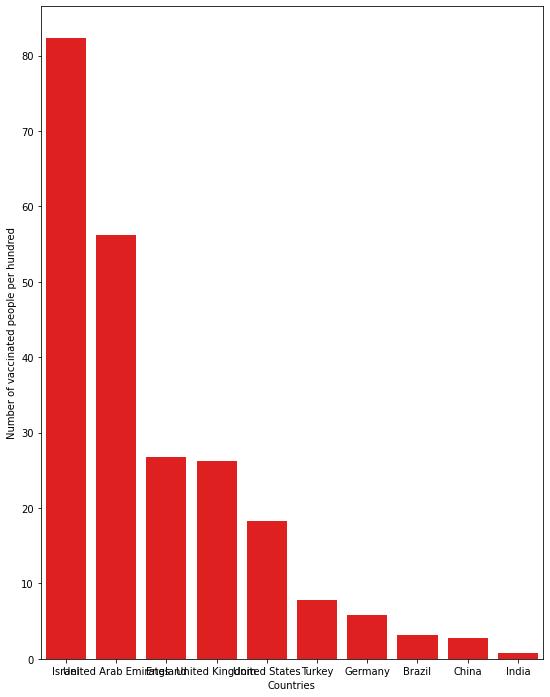

In [26]:
#Which country is vaccinating its citizens the fastest

col = ['country','total_vaccinations','iso_code','total_vaccinations_per_hundred','vaccines']
vacc_amount = df[col].groupby('country').max().sort_values('total_vaccinations', ascending = False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]

vacc_amount = vacc_amount.sort_values('total_vaccinations_per_hundred', ascending = False)

plt.figure(figsize=(9, 12))
sns.barplot(vacc_amount.index, vacc_amount.total_vaccinations_per_hundred, color = 'r')

plt.ylabel('Number of vaccinated people per hundred')
plt.xlabel('Countries')
plt.show()


From the visualization below it is clear that Israel leads the world in terms of the number of doses per head of population, with more than 80 doses given for every 100 people.

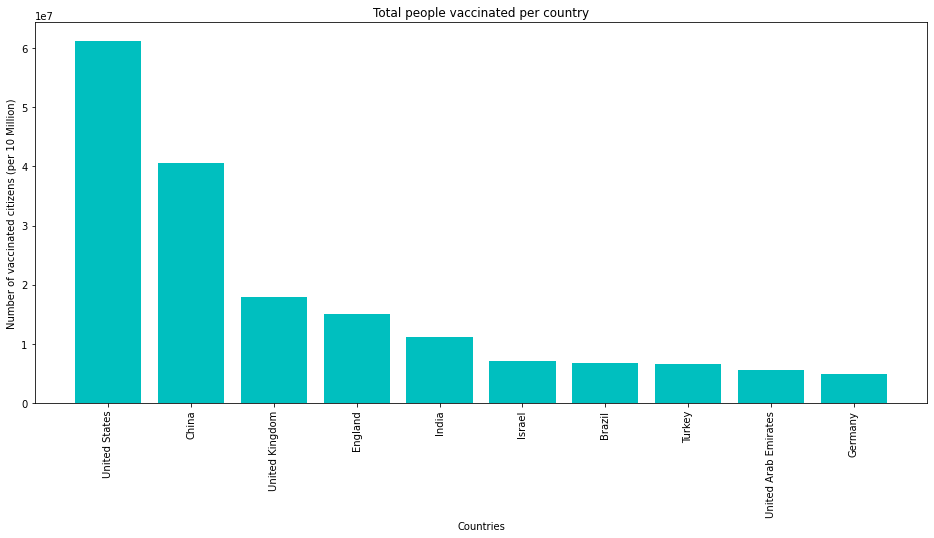

In [29]:
#Which country has the highest number of vaccinated people

cols = ['country', 'total_vaccinations', 'iso_code', 'vaccines']
vacc_amount = df[cols].groupby('country').max().sort_values('total_vaccinations', ascending=False).dropna(subset=['total_vaccinations'])
vacc_amount = vacc_amount.iloc[:10]

plt.figure(figsize=(16, 7))
plt.bar(vacc_amount.index, vacc_amount.total_vaccinations, color = 'c')

plt.title('Total people vaccinated per country')
plt.xticks(rotation = 90)
plt.ylabel('Number of vaccinated citizens (per 10 Million)')
plt.xlabel('Countries')
plt.show();

It is clear from the visualization below that the United States has the most vaccinated people around 60M.

In [15]:
#what combination of vaccines every country is using

fig = px.choropleth(df, locations="iso_code",
                    color="vaccines",
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   title= "Vaccines used by different countries")

fig.update_layout(showlegend=False)
fig.show()